Codigo original en [doppler-effect](https://github.com/dvishal485/doppler-effect) en GitHub

# Efecto Doppler

In [1]:
from tools.doppler import *
from tools.doppler_wave import *
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Physical Values
v_sound = 343  # Velocidad del sonido
x_source, y_source = (0, 0)  # Coordenadas de la fuente
x_observer, y_observer = (5, 0)  # Coordenadas del receptor
vx_source, vy_source = (100, 0)  # Velocidad Fuente
vx_observer, vy_observer = (0, 0)  # Velocidad receptor
frequency = 800  # Frecuencia de la onda de sonido

In [3]:
doppler = Doppler(
    source_frequency=frequency, 
    v_observer=[vx_observer, vy_observer],
    v_source=[vx_source, vy_source], 
    source_coordinate=[x_source, y_source], 
    observer_coordinates=[x_observer, y_observer], 
    v_sound=v_sound
)

In [4]:
print(f"Sound Wavelength = {doppler.wavelength} m")
print(f"Distance between Source and Observer = {doppler.distance} m")
print(f"Apparent Frequency = {doppler.apparent_frequency()} Hz")
print(f"Apparent Wavelength = {doppler.apparent_wavelength()} m")

Sound Wavelength = 0.42875 m
Distance between Source and Observer = 5.0 m
Apparent Frequency = 1129.2181069958847 Hz
Apparent Wavelength = 0.5537500000000001 m


In [5]:
# Program values
max_waves = frequency/5
time_limit = 1  # (integer)
plot = True
program_speed = 2  # 1 or 2

<IPython.core.display.Javascript object>


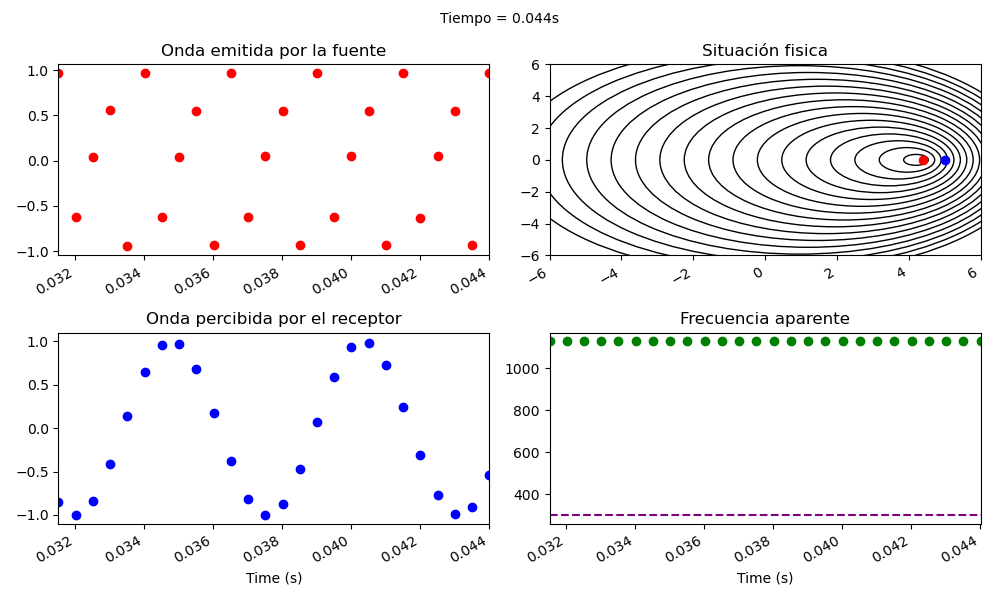

KeyboardInterrupt: 

In [6]:
plt.ion()
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 6))
ax[1][1].axhline(y=300, color="purple", linestyle="--")

max_x = np.max([x_source + vx_source*time_limit,
               x_observer + vx_observer*time_limit])*1.2
max_y = np.max([y_source + vy_source*time_limit,
               y_observer + vy_observer*time_limit])*1.2
x_diff, y_diff = (np.abs(x_observer-x_source), np.abs(x_observer-x_source))
max_diff = np.max([x_diff, y_diff])*1.2
max_coordinate = np.max([max_x, max_y])
waves = []
dt = 1/frequency
w = 2*np.pi*frequency
k = 0

apparent_frequencies = np.array([])


for time_frame in np.linspace(0, time_limit, int(np.floor((10 * frequency * time_limit)/program_speed))):
    t = time_frame * program_speed
    k += 1 * program_speed
    x1, y1 = (x_source + vx_source*t, y_source + vy_source*t)
    x2, y2 = (x_observer + vx_observer*t, y_observer + vy_observer * t)

    doppler = Doppler(source_frequency=frequency,
                      v_observer=[vx_observer, vy_observer],
                      v_source=[vx_source, vy_source],
                      source_coordinate=[x1, y1],
                      observer_coordinates=[x2, y2],
                      v_sound=v_sound)

    w_apparent = doppler.apparent_frequency()
    apparent_frequencies = np.append(apparent_frequencies, (w_apparent))

    
    ax[0][1].cla()
    ax[0][0].set_title('Onda emitida por la fuente')
    ax[1][0].set_title('Onda percibida por el receptor')
    ax[1][1].set_title('Frecuencia aparente')
    ax[0][1].set_title('Situación fisica')
    for i in [ax[1][0], ax[1][1]]:
        i.set_xlabel('Tiempo (s)')
    for i in waves:
        i.update(i.r + v_sound*dt*program_speed/10)
        ax[0][1].add_artist(i.wave)
    if k >= 10:
        new_Wave = Wave(x1, y1)
        ax[0][1].add_artist(new_Wave.wave)
        waves.append(new_Wave)
        k = 0
    if len(waves) > max_waves:
        waves.pop(0)
    ax[0][1].plot(x1, y1, 'ro')
    ax[0][1].plot(x2, y2, 'bo')
    ax[0][1].set_xlim(-max_diff,  max_diff)
    ax[0][1].set_ylim(-max_diff,  max_diff)

    if t > dt*10:
        for i in [ax[0][0], ax[1][0], ax[1][1]]:
            i.set_xlim(t-dt*10, t)
    else:
        for i in [ax[0][0], ax[1][0], ax[1][1]]:
            i.set_xlim(0, dt*10)
    ax[1][1].plot(t, w_apparent, 'go')
    ax[0][0].plot(t, np.sin(w*t), 'ro')
    ax[1][0].plot(t, np.sin(w_apparent*t), 'bo')
    fig.tight_layout()
    for i in ax:
        for m in i:
            plt.setp(m.get_xticklabels(), rotation=30,
                     horizontalalignment='right')
    fig.suptitle(f'Tiempo = {t:.3f}s', fontsize=10)
    fig.canvas.draw()
    fig.canvas.flush_events()
    fig.show()